## 통신사 고객 이탈 예측

통신 회사의 경우 신규 고객을 유치하는 동시에 수익 창출 기반을 늘리기 위해 계약 해지 (= 이탈)를 피하는 것이 중요합니다.

이탈을 살펴보면 더 나은 가격 제안, 더 흥미로운 패키지, 나쁜 서비스 경험 또는 고객의 개인적인 상황 변화와 같은 다양한 이유로 고객이 계약을 종료하게됩니다.

이탈 분석은 고객 이탈을 예측하고 이탈을 유발하는 근본적인 이유를 정의하는 귀중한 변수를 제공합니다.

이탈 측정 항목은 대부분 주어진 기간 (대부분 수개월) 내에 제품 또는 서비스를 취소 한 고객의 비율로 표시됩니다. 예를 들어, 통신 회사에 1000만 고객이 있는 경우. 고객이 1월 1일에 계약을 종료하고 1월 31일까지 500,000 건의 계약 종료를 받았습니다. 그러면, 1월의 월별 이탈률은 5 %가됩니다.

통신사는 머신러닝 모델을 적용하여 개별 고객을 기준으로 이탈을 예측하고 할인, 특별 제안 또는 기타 만족과 같은 대응 조치를 취하여 고객을 유지합니다. 고객 이탈 분석은 지도 학습 영역 내에서 일반적인 분류 문제입니다.

### 분석 순서

이 예에서는 Kaggle의 샘플 데이터 세트를 기반으로하는 기본 머신 러닝 파이프 라인이 빌드되고 다양한 모델 유형의 성능이 비교됩니다.

** 이 예에 사용 된 파이프 라인은 8 단계로 구성됩니다. **

1 단계 : 문제 정의 \
2 단계 : 데이터 수집 \
3 단계 : 탐색 적 데이터 분석 (EDA) \
4 단계 : 기능 엔지니어링 \
5 단계 : 학습 / 테스트 분할 \
6 단계 : 모델 평가 지표 정의 \
7 단계 : 모델 선택, 훈련, 예측 및 평가 \
8 단계 : 하이퍼 파라미터 튜닝 / 모델 개선

### 1 단계 : 문제 정의

- 핵심 과제는 개별 고객의 이탈 여부를 예측하는 것입니다. 이를 위해 머신 러닝 모델은 표본 데이터의 80%를 기반으로 훈련된다. 나머지 20%는 훈련된 모델을 적용하고 "이탈 / 비이탈"에 관한 예측력을 평가하는 데 사용된다.

- 부가적인 질문은 어떤 기능이 실제로 고객 이탈을 유도하는가 하는 것입니다. 이 정보를 사용하여 고객의 "페인 포인트"를 파악하고 고객을 지속시킬 수 있는 좋은 점을 제공함으로써 문제를 해결할 수 있습니다.

- 모델을 비교하고 이 작업에 가장 적합한 모델을 선택하기 위해 정확도가 측정됩니다. 데이터의 다른 특성에 기초하여, 예를 들어, 필요한 경우 클래스 간 균형(데이터 세트의 "이탈" 대 "비이탈" 수) 추가 메트릭스가 고려된다.

### 2 단계: 데이터 수집

- 이 분류 문제에 대한 데이터 세트는 Kaggle에서 가져온 것으로 IBM 샘플 데이터 세트 컬렉션(https://www.kaggle.com/blastchar/telco-customer-churn))에서 비롯된다.

- 사용 사례 파이프라인 구축은 사례 전체에 필요한 일부 기본 라이브러리를 가져오면서 시작됩니다. 여기에는 데이터 처리 및 처리를 위한 판다스와 Numpy, 시각화를 위한 Matplotlib와 Seaborn이 포함됩니다.

- 이 연습을 위해 데이터 세트(.csv 형식)를 로컬 폴더로 다운로드하고 주피터 노트북에 읽어 판다 데이터 프레임에 저장합니다.

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
# 경고(warning) 비표시
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### 3 단계: 탐색적 데이터 분석

- 데이터 수집 후에는 몇 가지 단계를 수행하여 데이터를 탐색합니다.
- 이 단계의 목표는 데이터 구조를 이해하고 초기 전처리를 수행하고 데이터를 정리하며 데이터의 패턴과 불일치(예: 왜도, 특이치, 결측치)를 식별하고 가설을 구축 및 검증하는 것이다.

#### 데이터 이해하기

- EDA의 첫 번째 파트에서 데이터 프레임은 구조, 열 포함 및 데이터 유형에 대해 평가됩니다.
- 이 단계의 목표는 데이터 세트에 대한 일반적인 이해, 도메인 지식 확인 및 조사할 주제에 대한 첫 번째 아이디어 획득입니다.
- 이 단계에서는 몇 가지 기본적인 판다스 기능이 사용됩니다.

In [5]:
# 데이터 프레임의 변수(=컬럼)과 데이터 항목을 표시합니다.
df.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [6]:
# 데이터 유형, 모양 및 메모리 저장소를 포함한 데이터 프레임에 대한 요약을 가져옵니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# numerical 변수에 대한 통계 정보를 얻습니다.
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
# 모든 기능에 대한 고유 한 값이 콘솔에 인쇄되어 기능 값에 대해 더 깊이 이해할 수 있습니다.

# 열을 반복하여 열당 고유한 값을 가져옵니다.
for i in df.columns:
    print(f"Unique {i}'s count: {df[i].nunique()}")
    print(f"{df[i].unique()}\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Unique gender's count: 2
['Female' 'Male']

Unique SeniorCitizen's count: 2
[0 1]

Unique Partner's count: 2
['Yes' 'No']

Unique Dependents's count: 2
['No' 'Yes']

Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Unique PhoneService's count: 2
['No' 'Yes']

Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']

Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']

Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']

Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']

Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']

Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']

Unique StreamingTV's

### 변수의 의미

- 열과 열의 고유 값을 검사하여 기능에 대한 일반적인 이해를 구축할 수 있습니다. 기능을 여러 범주로 클러스터링할 수도 있습니다.

**Classification labels**
- Churn - 고객이 이탈했는지 여부 (Yes or No)

**Customer services booked**
- PhoneService - 고객에게 전화 서비스가 있는지 여부 (Yes, No)
- MultipleLines - 고객에게 여러 회선이 있는지 여부 (Yes, No, No phone service)
- InternetService - 고객의 인터넷 서비스 제공 업체 (DSL, Fiber optic, No)
- OnlineSecurity - 고객의 온라인 보안 여부 (Yes, No, No internet service)
- OnlineBackup - 고객의 온라인 백업 여부 (Yes, No, No internet service)
- DeviceProtection - 고객의 기기 보호 여부 (Yes, No, No internet service)
- TechSupport - 고객의 기술 지원 여부 (Yes, No, No internet service)
- StreamingTV - 고객이 스트리밍 TV를 가지고 있는지 여부 (Yes, No, No internet service)
- StreamingMovies - 고객이 스트리밍 영화를 가지고 있는지 여부 (Yes, No, No internet service)

**Customer account information**
- Tenure - 고객이 회사에 머물렀던 개월 수
- Contract - 고객의 계약 기간 (Month-to-month, One year, Two year)
- PaperlessBilling - 고객의 paperless billing 여부 (Yes, No)
- PaymentMethod - 고객의 결제 방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - 매월 고객에게 청구되는 금액
- TotalCharges - 고객에게 청구 된 총 금액

**Customers demographic info**
- customerID - 고객 ID
- Gender - 고객 성별 (남자, 여자)
- SeniorCitizen - 고객이 노인인지 여부 (1, 0)
- Partner - 고객에게 파트너가 있는지 여부 (Yes, No)
- Dependents - 고객에게 부양 가족이 있는지 여부 (Yes, No)

### EDA를 위한 데이터 전처리

In [9]:
# "TotalCharges" 와 "tenure" 의 타입을 float 으로 바꾸기.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

def feature_to_float(feature_list, df):
    for i in feature_list:
        df[i] = df[i].astype(float)
    return df

feature_to_float(['tenure'], df)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No     1.0   
1     5575-GNVDE    Male              0      No         No    34.0   
2     3668-QPYBK    Male              0      No         No     2.0   
3     7795-CFOCW    Male              0      No         No    45.0   
4     9237-HQITU  Female              0      No         No     2.0   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes    24.0   
7039  2234-XADUH  Female              0     Yes        Yes    72.0   
7040  4801-JZAZL  Female              0     Yes        Yes    11.0   
7041  8361-LTMKD    Male              1     Yes         No     4.0   
7042  3186-AJIEK    Male              0      No         No    66.0   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [10]:
# 가독성을 높이기 위해 "PaymentMethod"의 데이터 값 이름을 바꿉니다.
payment_column = {'Electronic check': 'E-Check' , 'Mailed check': 'Mailed Check',
                  'Bank transfer (automatic)': 'Bank Transfer', 'Credit card (automatic)': 'Credit Card'}
df["PaymentMethod"].replace(payment_column, inplace=True)

In [11]:
# 데이터 유형에 의도하지 않은 데이터 유형이 있는지 확인합니다. (Checking the data types for any unintended data types.)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# 결측 값 개수 확인
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

** 해석 **

- “TotalCharges”에 대해 11 개의 결 측값을 보여줍니다.
-  뒤에서 결측값은 간단하게 삭제.

### 가설 설정

데이터에 포함된 변수를 살펴보고 이를 고객 이탈에 미칠 수 있는 영향과 연결하면 다음과 같은 가설을 세울 수 있습니다.

- 가설 1: 계약 기간이 길수록 고객이 해지 / 연장 결정에 직면하는 빈도가 적고 잠재적으로 적은 노력으로 계약에 가치를 부여하므로 고객이 이탈 할 가능성이 적습니다.
- 가설 2: 고객은 복잡한 제품 번들보다 관련 제품 구성 요소가 거의없는 단순 계약을 기꺼이 취소 할 수 있습니다. 번들의 경우 고객은 관리 복잡성 감소를 중요하게 생각합니다. 또한 추가 서비스 구성 요소 (예 : 보안 패키지)에 의존하는 경우 계약 취소를 주저 할 수 있습니다.
- 가설 3: 배우자와 자녀가있는 고객은 가족을 위해 서비스를 계속 운영하기 위해 이탈을 줄일 수 있습니다.
- 가설 4: 임기, 계약 기간 및 추가 서비스 수는 이탈의 가장 중요한 요인으로 간주됩니다.
- 가설 5: 더 비싼 계약은 공급자를 변경하여 비용을 절감 할 수있는 기회가 더 높을 수 있으므로 이탈을 증가시킵니다.
- 가설 6: 노년층은 계약 해지와 관련된 오랜 노력으로 인해 이탈이 적은 경향이 있습니다.

### 데이터 탐색

In [13]:
# 모든 그림에 5등분 스타일을 적용합니다.
plt.style.use("fivethirtyeight")

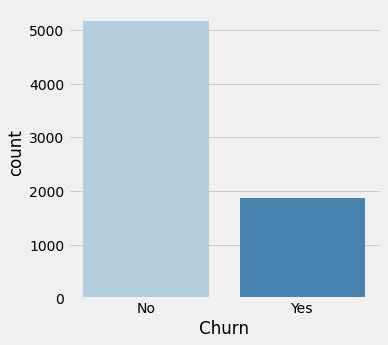

In [14]:
# 이탈 빈도수 분포를 표시합니다.
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['Churn'], palette="Blues", linewidth=1)
plt.show()

** 해석 **

- 플롯은 이동자와 비이동자 사이의 데이터의 클래스 불균형을 보여줍니다.

- 이를 해결하기 위해서는 재샘플링이 적절한 접근법이 될 것이다.

- 이 사례를 단순하게 유지하기 위해 불균형을 계속 유지하고 모델 평가를 위해 특정 메트릭을 선택합니다.

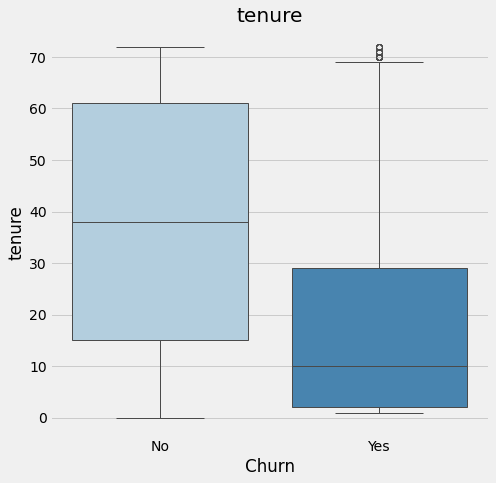

In [15]:
# 간단한 버전
# Tenure에 대한 박스 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.boxplot(x=df["Churn"], y=df["tenure"], palette="Blues", linewidth=1)
ax.set_title("tenure")

plt.show()

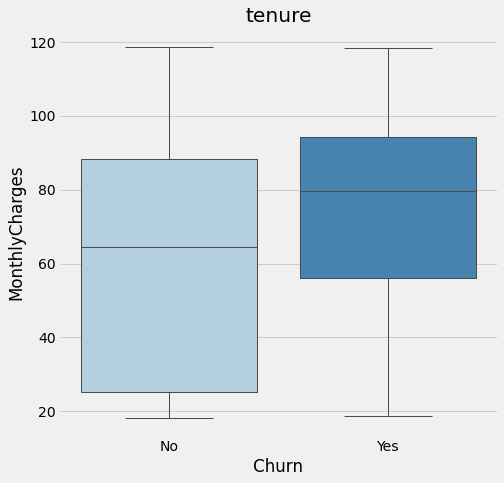

In [16]:
# MonthlyCharges에 대한 박스 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.boxplot(x=df["Churn"], y=df["MonthlyCharges"], palette="Blues", linewidth=1)
ax.set_title("tenure")

plt.show()

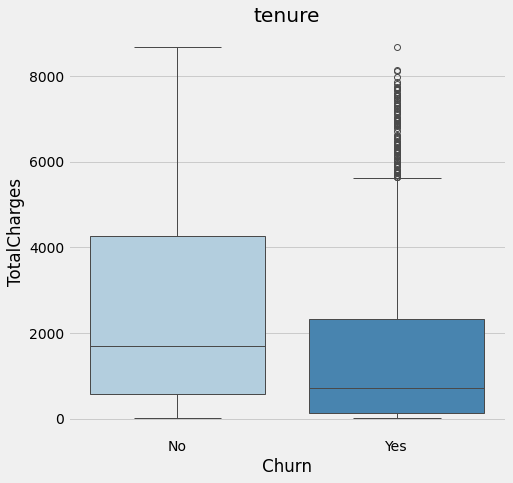

In [17]:
# TotalCharges 에 대한 박스 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.boxplot(x=df["Churn"], y=df["TotalCharges"], palette="Blues", linewidth=1)
ax.set_title("tenure")

plt.show()

In [18]:
# 어렵지만 유용한 버전
# 박스 플롯을 생성하는 함수를 만듭니다
# 사이즈 조절을 위하여 plots 객체 생성

plots = {1 : [111], 2: [121, 122], 3: [131, 132, 133], 4: [221, 222, 223, 224], 5: [231, 232, 233, 234, 235], 6: [231, 232, 233, 234, 235, 236]}

def boxplot(x, y, df):

    rows = int(str(plots[len(y)][0])[0]) # 사이즈 조절
    columns = int(str(plots[len(y)][0])[1]) # 사이즈 조절
    plt.figure(figsize=(7*columns, 7*rows)) # 사이즈 조절

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.boxplot(x=x, y=j, data=df[[x, j]], palette="Blues", linewidth=1)
        ax.set_title(j)

    return plt.show()

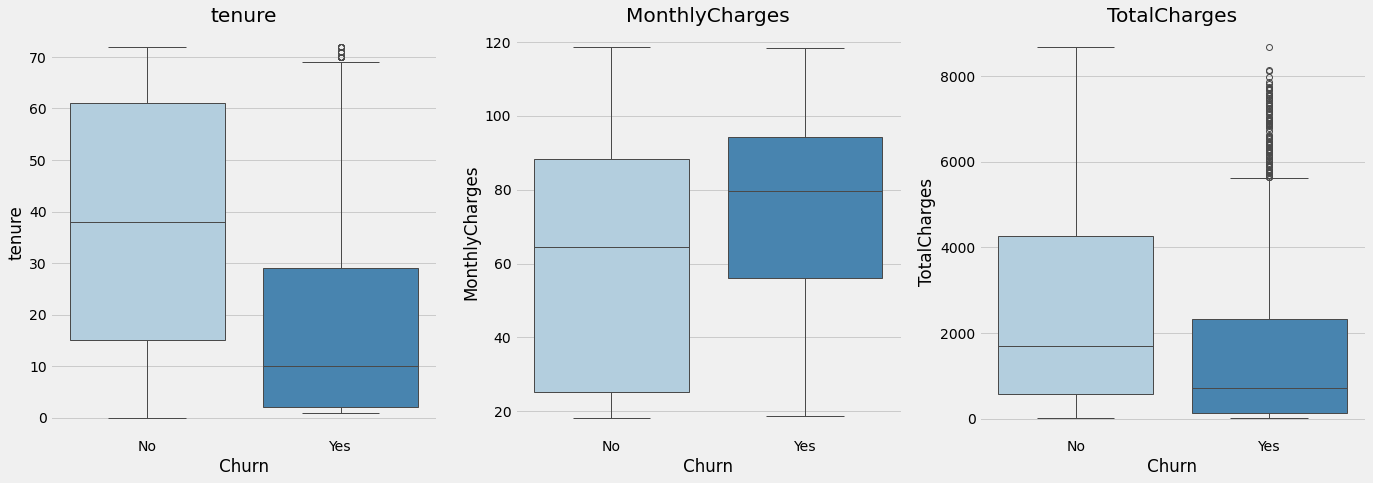

In [19]:
# Tenure, MonthlyCharges and TotalCharges 에 대한 박스 플롯을 그린다.

boxplot("Churn", ["tenure", "MonthlyCharges", "TotalCharges"], df)

** Plot insights **

- 이탈 고객은 평균 10개월로 비이탈 고객 평균 38개월에 비해 임기가 훨씬 낮습니다.

- 이탈 고객은 월평균 80달러로 비이탈고객(중간 65달러)에 비해 월평균 요금이 높고 사분위간 범위가 훨씬 낮습니다.

- TotalCharges는 임기 및 월간 요금의 결과이며 개별적으로 더 통찰력이 있습니다.


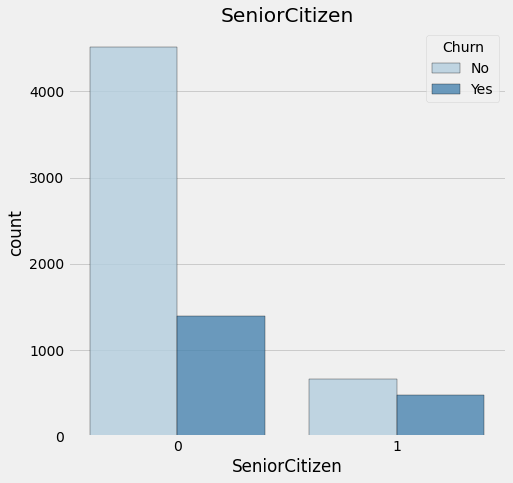

In [20]:
# 간단한 버전
# SeniorCitizen 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["SeniorCitizen"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("SeniorCitizen")

plt.show()

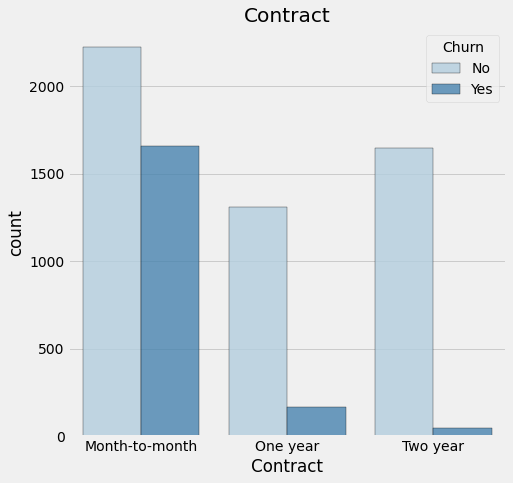

In [21]:
# Contract 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["Contract"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("Contract")

plt.show()

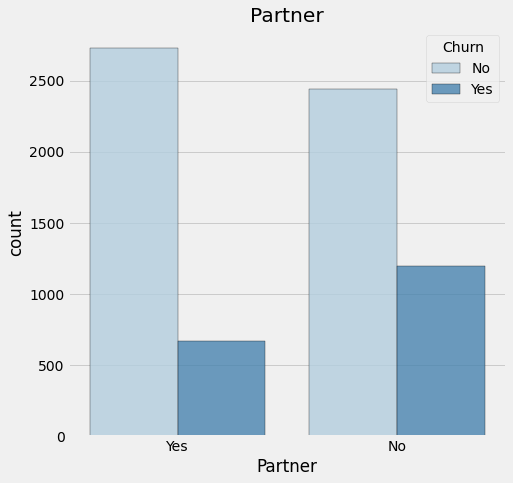

In [22]:
# Partner 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["Partner"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("Partner")

plt.show()

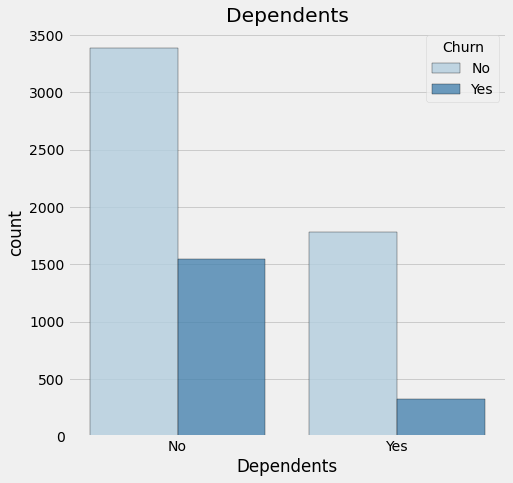

In [23]:
# Dependents 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["Dependents"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("Dependents")

plt.show()

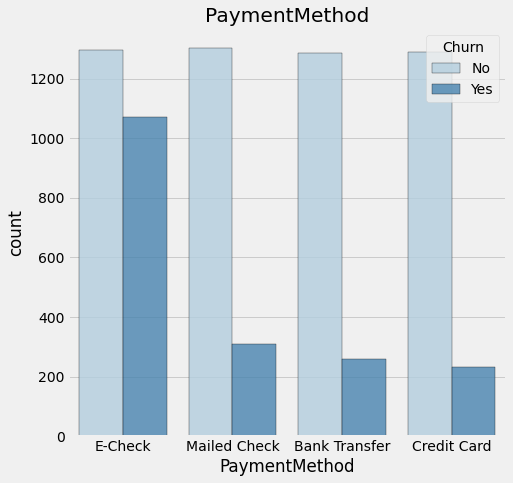

In [24]:
# PaymentMethod 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["PaymentMethod"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("PaymentMethod")

plt.show()

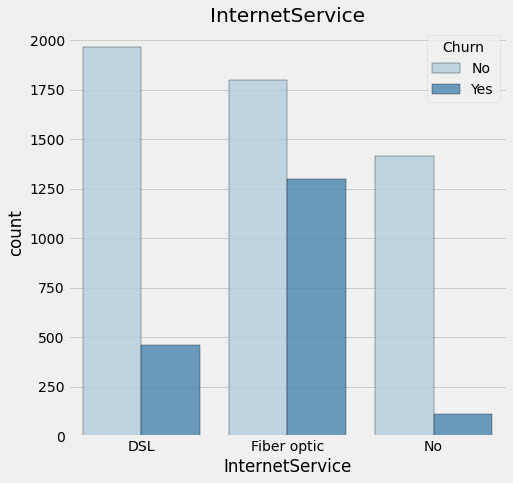

In [25]:
# InternetService 에 대한 Count 플롯을 그린다.

plt.figure(figsize=(7, 7)) # 사이즈 결정

ax = sns.countplot(x=df["InternetService"], hue=df["Churn"], data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
ax.set_title("InternetService")

plt.show()

In [26]:
# 어렵지만 유용한 버전
# Countplots을 생성하는 함수를 만듭니다.

def countplot(x, y, df):

    rows = int(str(plots[len(y)][0])[0]) # 사이즈 조절
    columns = int(str(plots[len(y)][0])[1]) # 사이즈 조절

    plt.figure(figsize=(7*columns, 7*rows)) # 사이즈 조절

    for i, j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax = sns.countplot(x=j, hue=x, data=df, palette='Blues', alpha=0.8, linewidth=0.4, edgecolor='black')
        ax.set_title(j)

    return plt.show()

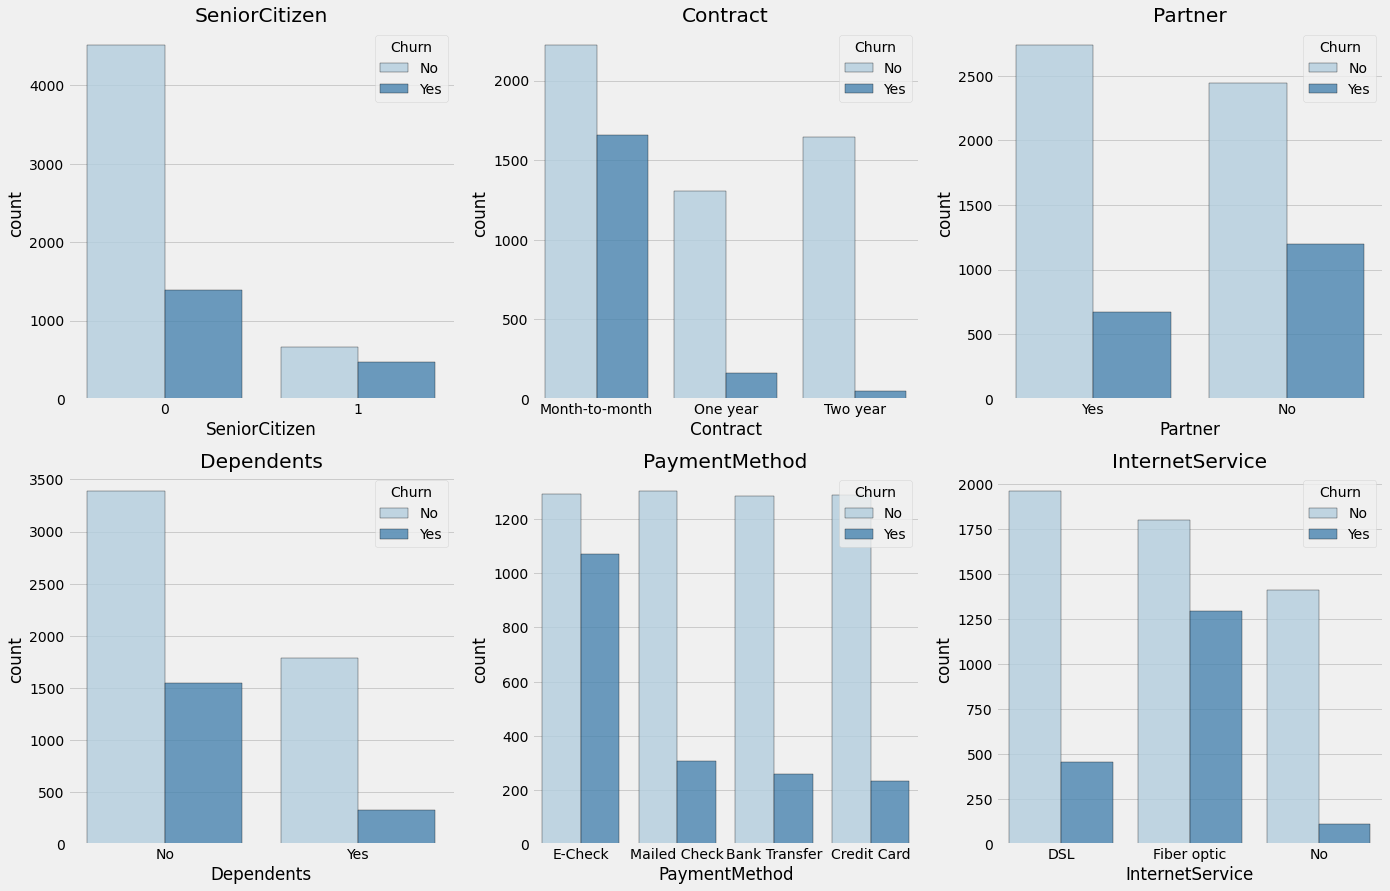

In [27]:
# 다양한 변수에 대한 카운트 플롯을 생성합니다.
countplot("Churn", ['SeniorCitizen', 'Contract', 'Partner', 'Dependents', 'PaymentMethod', 'InternetService'], df)

** Plot insights **

- 고령자 이탈률은 비 고령자 이탈률보다 훨씬 높습니다.
- 월간 계약의 해지율은 다른 계약 기간보다 훨씬 높습니다.
- 파트너가 없는 고객의 경우 다소 높은 이탈률.
- 자녀가 없는 고객의 이탈률이 훨씬 높습니다.
- 결제 수단 전자 수표는 다른 결제 수단보다 이탈률이 훨씬 높습니다.
- 계약의 일부로 InternetService fiber optic를 사용하는 고객은 이탈률이 훨씬 높습니다.

### Numerical Features 의 이상치 확인

In [28]:
# IQR 방법을 적용하여 특이치를 확인합니다.

numerical_features = ["tenure", "MonthlyCharges", "TotalCharges"]
df_num = df[numerical_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

** 해석 **

IQR 방법으로 탐지 된 Numerical Features 의 이상 값 없음 - 조정되지 않음.

### Data Cleaning

In [29]:
# 결측치 제거
df = df.dropna()

### Feature Engineering 실행하기

데이터 유형 및 값을 기반으로 머신 가독성 및 추가 분석을 위한 변수를 전처리/엔지니어링하기 위하여 다음 작업이 정의됩니다.

**컬럼 제거**
- customerID: 관련이 없음.

**No action**
- SeniorCitizen

**Label encoding**

다음 변수들은 범주형이며 각각 2개의 값(대부분 예/아니오)을 취하므로 이진 정수로 변환됩니다.

- gender
- Partner
- Dependents
- Churn
- PhoneService
- PaperlessBilling

**One-Hot Encoding**

다음 변수들은 범주형이지만 순서형(순위가 없음)이 아니라 두 개 이상의 값을 사용합니다. 각 값에 대해 값이 데이터 항목에서 발생했는지 여부를 나타내는 이진 정수로 새 변수가 생성됩니다(1 또는 0).

- MultipleLines
- InternetService
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- Contract
- PaymentMethod

**Min-Max Scaling**

Numerical features의 값은 0과 1 범위 사이에서 조정된다. Min-max scaler는 스케일링을 위한 표준 접근법이다. 정규 분포 형상의 경우 평균 0과 표준 편차 1 주변의 값을 확장하는 standard scaler를 사용할 수 있습니다. 단순성을 위해 모든 Numerical features에 min-max scaler를 사용한다.

- tenure
- TotalCharges
- MonthlyCharges

### 원-핫 인코딩 이란?

- 원 핫 인코딩(One hot Encoding)이란 범주형 변수에 대해 단 하나의 값만 True이고 나머지는 모두 False인 인코딩을 말합니다.
- 예를 들어 [0, 0, 1, 0, 0]처럼 정답을 뜻하는 원소만 1이고 나머지는 모두 0인 배열입니다. (경우에 따라서는 모두 [0, 0, 0, 0, 0] 처럼 모두 0으로 표현될 수도 있습니다.)
- 이렇게 범주형 변수를 원 핫 인코딩을 통해 표현하는 이유는 연산 편의성, 다양한 모델 적용, 정확도 향상 등이 있습니다.

<!-- <div> -->
<!-- <img src="./pic/원핫인코딩.png" width="400" height="400" align= center> -->
<!-- </div> -->

### 4 단계: 특성 공학 (Feature Engineering)

- 특성 공학에서는 EDA의 끝에 식별된 단계가 실행됩니다.
- 또한 확장된 변수으로 부터 새로운 변수가 생성되고 모든 변수가 숫자형으로 변환된 후 상관 분석이 수행된다.

**Feature Selection / Generation**

In [30]:
# CustomerID 변수를 버린다.
df = df.drop(columns='customerID')

In [31]:
# 사용된 추가 서비스 수를 합산하여 새 변수 "Number_AdditionalServices"를 생성합니다.
df['Number_AdditionalServices'] = (df[['OnlineSecurity', 'DeviceProtection',
                                       'StreamingMovies', 'TechSupport', 
                                       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

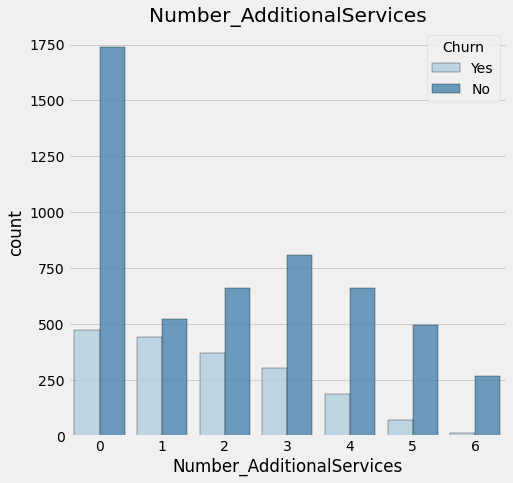

In [32]:
# 새로운 변수의 Countplot을 그린다.
countplot('Churn', ['Number_AdditionalServices'], df)

** Plot insights **

- Countplot을 보면 부가 서비스가 1개인 고객의 이탈률이 매우 높습니다.
- 부가서비스 수가 매우 많은 고객은 이탈율이 낮습니다.

**Label Encoding**

In [33]:
# 식별된 열에 대한 레이블 인코딩.

features_le = ['gender', 'Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling']

def label_encoding(features, df):
    for i in features:
        df[i] = df[i].map({'Yes': 1, 'No': 0})
    return

label_encoding(['Partner', 'Dependents', 'Churn', 'PhoneService', 'PaperlessBilling'], df)

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

**One-Hot-Encoding**

In [34]:
# 식별된 열에 대한 원-핫 인코딩.

features_ohe = ['MultipleLines', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'Number_AdditionalServices']

df = pd.get_dummies(df, columns=features_ohe)

**Feature Rescaling: Min-Max-Scaling**

In [35]:
# 식별된 열에 대한 Min-Max 스케일링.

from sklearn.preprocessing import MinMaxScaler

features_mms = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_features_mms = pd.DataFrame(df, columns=features_mms)
df_remaining_features = df.drop(columns=features_mms)

mms = MinMaxScaler()
rescaled_features = mms.fit_transform(df_features_mms)

df_rescaled_features = pd.DataFrame(rescaled_features, columns=features_mms, index=df_remaining_features.index)

df = pd.concat([df_remaining_features, df_rescaled_features], axis=1)

**상관 분석**

<Axes: >

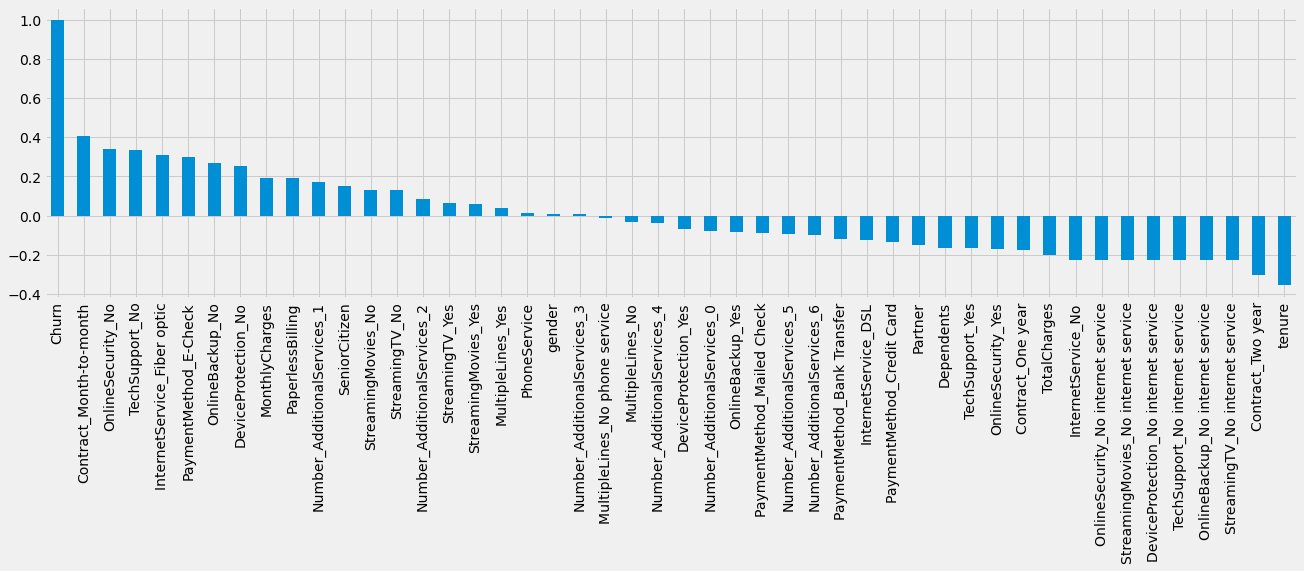

In [36]:
# Churn과 나머지 각 변수의 상관관계에 대한 상관도를 표시합니다.

plt.figure(figsize=(16,10))
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

### 5 단계: 훈련과 테스트 셋으로 분리 (Train-Test-Split)

- 모델 학습 및 테스트 단계 수행을 위해 데이터 세트는 학습 데이터 80 %와 테스트 데이터 20 %로 나뉩니다.

- "Churn"열은 클래스 ("y")로 정의되고 나머지 열은 기능 ("X")으로 정의됩니다.

In [37]:
#sklearn의 분할 함수 train_test_split 적용

from sklearn.model_selection import train_test_split

X1 = df.drop('Churn', axis=1)
X = X1.values
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6 단계: 모델 성능 평가 메트릭스 (Model Evaluation Metrics)

선택한 모델의 성능 평가를 위해 다양한 메트릭이 사용됩니다.

**Feature weights**

- 예측을 생성하기 위해 모델에서 사용하는 상위 변수를 나타냅니다.

**Accuracy score**

- 학습 세트 및 테스트 세트에 대한 모델의 전체 정확도를 표시합니다.
- 정확도는 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표입니다.
- 정확도(Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

**Confusion matrix:**

- 실제 값과 비교하여 참 및 거짓 예측 그리드를 표시합니다.
- 이진 분류에서 성능 지표로 잘 활용되는 오차행렬(Confusion Matrix)은 학습된 분류 모델이 예측을 수행하면서 얼마나 혼동하고(Confusion)있는지를 보여주는 지표입니다.
- 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표입니다.

<div>
<img src="./pic/혼동행렬2.PNG" width="500" height="500" align= center>
</div>

- TN: 예측값을 Negative값 0으로 예측했고 실제 값 역시 Negative 값 0
- FP: 예측값을 Positive값 1로 예측했는데 실제 값은 Negative 값 0
- FN: 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1
- TP: 예측값을 Positive값 1로 예측했는데 실제 값 역시 Positive 값 1

<!-- <div> -->
<!-- <img src="./pic/혼동행렬.png" width="400" height="400" align= center> -->
<!-- </div> -->

**ROC Curve**

- 클래스 예측의 다양한 임계 값 (예 : 10 %, 50 % 또는 90 %의 임계 값을 사용하여 이탈 예측으로 이어지는 임계 값)에 대해 참 양성률 (TPR) 및 거짓 양성률 (FPR)을 통합하여 모델의 진단 능력을 보여줍니다. )
- ROC곡선은 FPR(False Positive Rate)이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선

**AUC (for ROC)**

- ROC 곡선과 관련된 모델 클래스 간의 전체 분리 성을 측정합니다 .

**Precision-Recall-Curve**

- 클래스 예측의 여러 임계 값에 대해 FPR (false positive rate)과 FNR (false negative rate)을 비교하여 진단 능력을 보여줍니다.
- 실제 부정의 수에 의존하지 않고 불균형을 배제하는 정밀도와 재현성에 초점을 맞추기 때문에 높은 수준의 불균형 (음수 값이 과도하게 표시됨)이있는 데이터 세트에 적합합니다.

**F1 Score**

- 정밀도와 재현율의 조화 평균을 구축하여 둘 사이의 절충안을 측정합니다.
- F1 스코어(Score)는 정밀도와 재현율을 결합한 지표입니다.
- F1스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 값을 가집니다.
- F1 스코어의 공식은 다음과 같습니다.

<div>
<img src="./pic/F1.PNG" width="400" height="400" align= center>
</div>

**AUC (for PRC)**

- 정밀도-재현율 곡선과 관련된 모델 클래스 간의 전체 분리 성을 측정합니다 .

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [39]:
# 분류기의 특성 가중치를 표시하는 함수를 정의한다.

def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index=X_df.columns.values).sort_values(ascending=False)

    top_weights_selected = weights[:10]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Top 10 Features')
    top_weights_selected.plot(kind="bar")

    bottom_weights_selected = weights[-10:]
    plt.figure(figsize=(7,6))
    plt.tick_params(labelsize=10)#plt.xlabel(fontsize=10)
    plt.title(f'{classifier_name} - Bottom 10 Features')
    bottom_weights_selected.plot(kind="bar")

    return print("")

In [40]:
# 분류기에 대한 혼동 행렬과 훈련 및 테스트 정확도를 표시하는 함수를 정의한다.

def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], 
                          cmap=plt.cm.Blues, normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    fig, ax = plt.subplots(figsize=(7, 6))
    plot_confusion_matrix(classifier, X_test, y_test, display_labels=["No Churn", "Churn"], 
                          cmap=plt.cm.Blues, normalize='true', ax=ax)
    ax.set_title(f'{classifier_name} - Confusion Matrix (norm.)')
    plt.show()

    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train)} (as comparison)')
    return print("")

In [41]:
def confusion_matrix_plot(X_train, y_train, X_test, y_test, classifier, y_pred, classifier_name):
    # 1. 혼동 행렬 (비정규화)
    fig, ax = plt.subplots(figsize=(7, 6))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(f'{classifier_name} - Confusion Matrix')
    plt.show()

    # 2. 혼동 행렬 (정규화된 버전)
    fig, ax = plt.subplots(figsize=(7, 6))
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')  # normalize='true'로 정규화
    disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=["No Churn", "Churn"])
    disp_norm.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
    ax.set_title(f'{classifier_name} - Confusion Matrix (Normalized)')
    plt.show()

    # 3. 정확도 출력
    print(f'Accuracy Score Test: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Accuracy Score Train: {classifier.score(X_train, y_train):.4f} (as comparison)')
    print("")

In [42]:
# ROC 곡선과 AUC 점수를 표시하는 함수를 정의한다.

def roc_curve_auc_score(X_test, y_test, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_name} - ROC Curve')
    plt.show()

    return print(f'AUC Score (ROC): {roc_auc_score(y_test, y_pred_prob)}\n')

In [43]:
# 정밀도-재현율-곡선과 F1점수와 AUC점수를 표시하는 함수 정의

def precision_recall_curve_and_scores(X_test, y_test, y_pred, y_pred_probabilities, classifier_name):

    y_pred_prob = y_pred_probabilities[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{classifier_name} - Precision-Recall Curve')
    plt.show()

    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)

    return print(f'F1 Score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

### 7 단계: 모델 선택 (Model Selection), 학습, 예측 그리고 평가 (Training, Prediction and Assessment)

- 처음에는 여러 모델을 테스트하고 여러 메트릭으로 성능을 측정합니다.
- 이러한 모델은 이후 단계에서 하이퍼 파라미터를 조정하여 최적화됩니다.
- 사용 된 모델은 다음과 같습니다.

1) K Nearest Neighbors — 빠르고 간단하며 인스턴스 기반 \
2) 로지스틱 회귀 — 빠르고 선형적인 모델 \
3) Random Forest — 의사 결정 트리를 기반으로하는 느리지 만 정확한 앙상블 모델 \
4) 서포트 벡터 머신 -여기서 비선형 형태로 사용되는 더 느리지 만 정확한 모델

### K Nearest Neighbors

<!-- <div> -->
<!-- <img src="./pic/knn.png" width="400" height="400" align= center> -->
<!-- </div> -->

- KNN 알고리즘을 간단하게 정의 하자면 새로운 데이터와 기존 데이터들간 거리를 측정하고 가까운 데이터들의 종류가 무엇인지 확인하여 새로운 데이터의 종류를 판별하는 알고리즘입니다.

- 여기서 K는 인접한 데이터의 갯수를 의미합니다.

- 그래서 K=1, K=3 일때 측정되는 종류가 달라질 수 있는데 예시로 알아보겠습니다.

<div>
<img src="./pic/knn2.PNG" width="400" height="400" align= center>
</div>

** K가 1일때는 가장 가까운 데이터의 종류로 선택됩니다. **

- 위 그림에서 세모가 새로운 데이터라면 가장 가까운 별로 분류 됩니다.

** K가 3일때는 가장 가까운 데이터를 순서대로 뽑습니다. **

- 위 그림에서는 세모랑 가장 가까운 3개의 종류를 뽑으면 동그라미2, 별1 됩니다.

- 동그라미가 2개로 가장 많기 때문에 세모는 동그라미가 됩니다.

- K=1, K=3의 개수에 따라 예측이 달라지는 것을 확인할 수 있습니다.

**  KNN 알고리즘은 K에 따라 결과가 달라지기 때문에 K를 정해주는 것이 가장 중요한 요소 입니다. **

**  K를 너무 작게 설정 했을 경우 과적합의 우려 되며 K를 너무 크게 설정했을 경우 데이터 구조 파악이 어려습니다. **

In [44]:
from sklearn.neighbors import KNeighborsClassifier

# 훈련 세트를 기반으로 KNN 분류기를 생성하고 훈련시킨다.

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# 테스트 세트의 훈련된 분류기로 예측(클래스와 확률)을 한다.

y_pred_knn = knn.predict(X_test)
y_pred_knn_prob = knn.predict_proba(X_test)

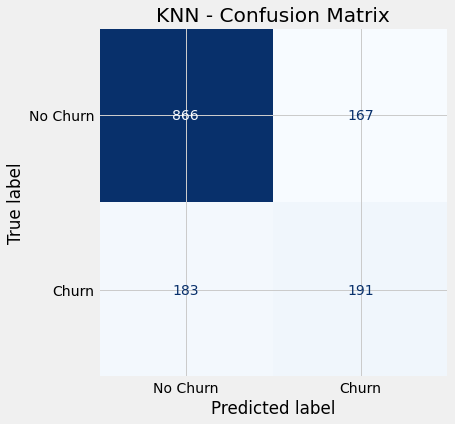

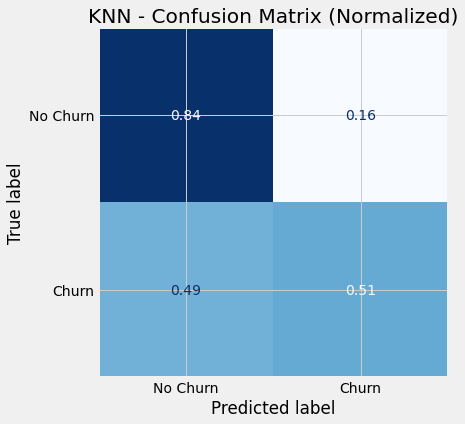

Accuracy Score Test: 0.7512
Accuracy Score Train: 0.8407 (as comparison)



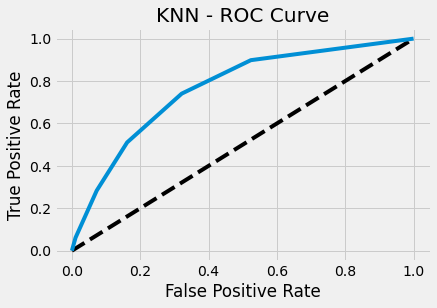

AUC Score (ROC): 0.7642063249659627



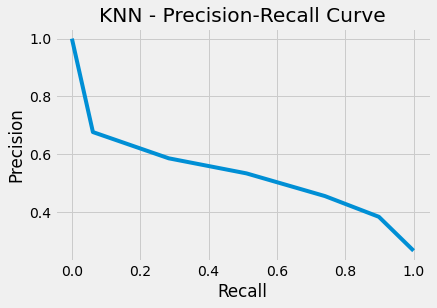

F1 Score: 0.5218579234972678 
AUC Score (PR): 0.5314716938986563



In [45]:
# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn, y_pred_knn, 'KNN')
roc_curve_auc_score(X_test, y_test, y_pred_knn_prob, 'KNN')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn, y_pred_knn_prob, 'KNN')

### Logistic Regression

- 로지스틱 회귀(Logistic Regression)는 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.

- 스팸 메일 분류기 같은 예시를 생각하면 쉽다.
- 어떤 메일을 받았을 때 그것이 스팸일 확률이 0.5 이상이면 spam으로 분류하고, 확률이 0.5보다 작은 경우 ham으로 분류하는 거다.
- 이렇게 데이터가 2개의 범주 중 하나에 속하도록 결정하는 것을 2진 분류(binary classification)라고 한다.

** 예를 들어 어떤 학생이 공부하는 시간에 따라 시험에 합격할 확률이 달라진다고 해보자. **
- 선형 회귀를 사용하면 아래와 같은 그림으로 나타낼 수 있다.

<!-- <div> -->
<!-- <img src="./pic/로지스틱회귀.png" width="500" height="500" align= center> -->
<!-- </div> -->

- 공부한 시간이 적으면 시험에 통과 못하고, 공부한 시간이 많으면 시험에 통과한다는 식으로 설명할 수 있다.
- 그런데 이 회귀선을 자세히 살펴보면 확률이 음과 양의 방향으로 무한대까지 뻗어 간다. 말 그대로 ‘선’이라서. 그래서 공부를 2시간도 안 하면 시험에 통과할 확률이 0이 안 된다. 이건 말이 안 된다.

- 만약 로지스틱 회귀를 사용하면 아래와 같이 나타난다.

<!-- <div> -->
<!-- <img src="./pic/로지스틱회귀2.png" width="500" height="500" align= center> -->
<!-- </div> -->

- 시험에 합격할 확률이 0과 1사이의 값으로 그려진다. 이제야 좀 납득이 된다.

** 로지스틱 회귀에서는 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거친다. **

1) 모든 속성(feature)들의 계수(coefficient)와 절편(intercept)을 0으로 초기화한다.\
2) 각 속성들의 값(value)에 계수(coefficient)를 곱해서 log-odds를 구한다.\
3) log-odds를 sigmoid 함수에 넣어서 [0,1] 범위의 확률을 구한다.

In [46]:
from sklearn.linear_model import LogisticRegression

# 훈련 세트를 기반으로 로지스틱 회귀 모형을 생성 및 훈련합니다.

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_prob = logreg.predict_proba(X_test)

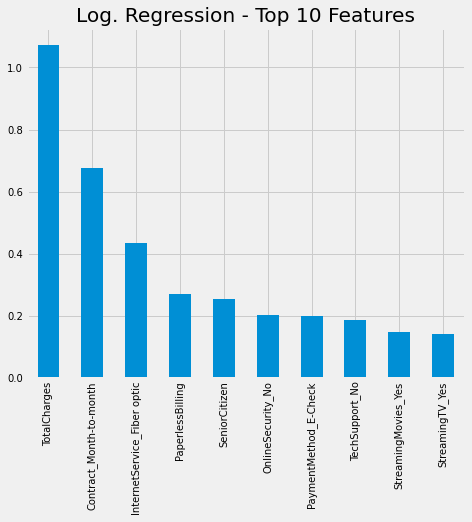

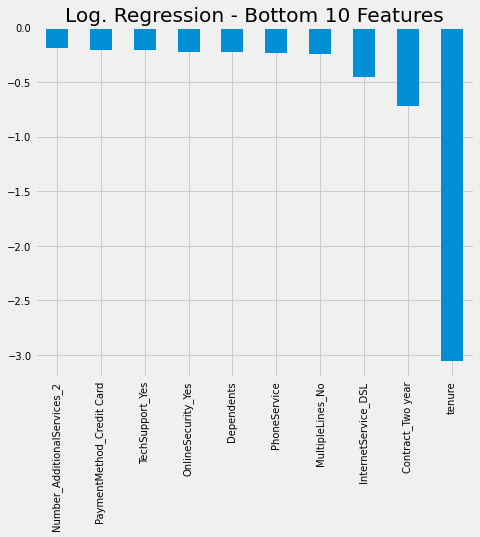

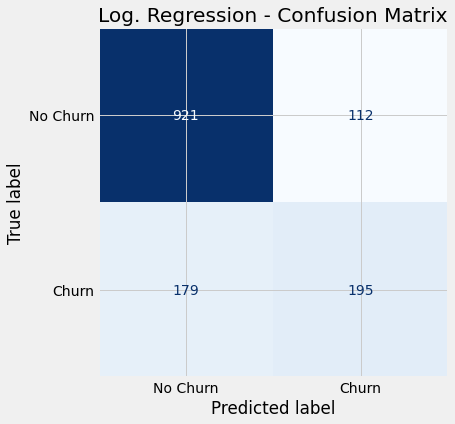

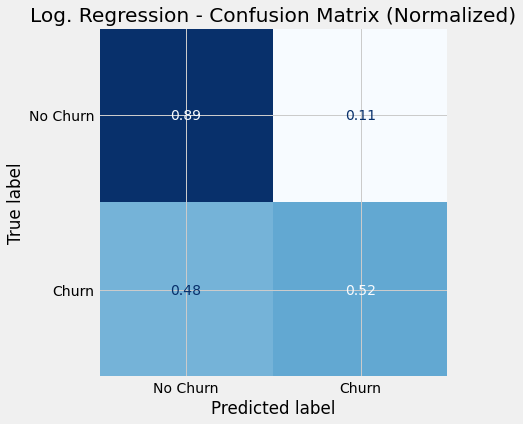

Accuracy Score Test: 0.7932
Accuracy Score Train: 0.8075 (as comparison)



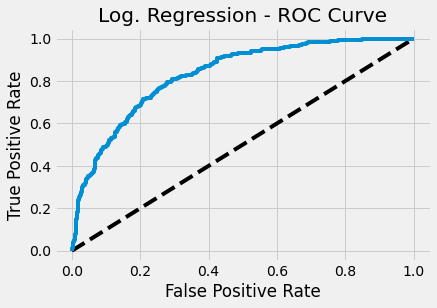

AUC Score (ROC): 0.8319028218521414



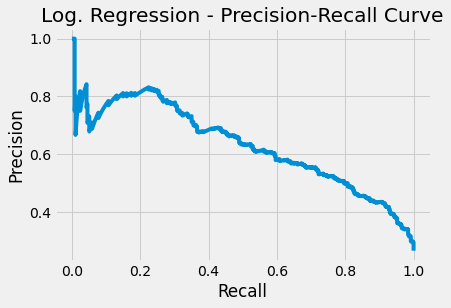

F1 Score: 0.5726872246696035 
AUC Score (PR): 0.6303460780834496



In [48]:
# 모델 평가 시각화

feature_weights(X1, logreg, 'Log. Regression')
confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg, y_pred_logreg, 'Log. Regression')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_prob, 'Log. Regression')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg, y_pred_logreg_prob, 'Log. Regression')


### Random Forest

- 학습 전용 데이터를 랜덤 샘플링하여 다수의 결정 트리 만들고, 만들어진 결정 트리들의 결과들을 모아 다수결로 최종 결과를 도출하는 알고리즘이다.
- 집단 학습을 기반으로 분류, 회귀, 클러스터링 등을 구현한다.
- 앙상블(ensemble) 학습 방법의 일종이다.(집단 학습)

<!-- <div> -->
<!-- <img src="./pic/랜덤포레스트.png" width="500" height="500" align= center> -->
<!-- </div> -->

- 결정 트리는 몇몇 입력 변수들에 따라 목표 변수의 값을 예측하는 모델이다.
- 랜덤포레스트는 이런 트리들을 다수 생성하여 집단 학습시켜 다수결로 결과를 도출하기에 높은 정확도를 가진다.


#### 결정 트리

- 결정 트리(Decision Tree, 의사결정트리, 의사결정나무라고도 함)는 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나입니다.
- 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습합니다.

** 매, 펭귄, 돌고래, 곰을 구분한다고 생각해봅시다. **
- 매와 펭귄은 날개를 있고, 돌고래와 곰은 날개가 없습니다. '날개가 있나요?'라는 질문을 통해 매, 펭귄 / 돌고래, 곰을 나눌 수 있습니다. 매와 펭귄은 '날 수 있나요?'라는 질문으로 나눌 수 있고, 돌고래와 곰은 '지느러미가 있나요?'라는 질문으로 나눌 수 있습니다.
- 아래는 결정 트리를 도식화한 것입니다.

<div>
<img src="./pic/결정나무.PNG" width="300" height="300" align= center>
</div>

- 이렇게 특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 합니다.
- 한번의 분기 때마다 변수 영역을 두 개로 구분합니다.
- 결정 트리에서 질문이나 정답을 담은 네모 상자를 노드(Node)라고 합니다.
- 맨 처음 분류 기준 (즉, 첫 질문)을 Root Node라고 하고, 맨 마지막 노드를 Terminal Node 혹은 Leaf Node라고 합니다.

<!-- <div> -->
<!-- <img src="./pic/결정나무2.png" width="300" height="300" align= center> -->
<!-- </div> -->

- 전체적인 모양이 나무를 뒤짚어 높은 것과 같아서 이름이 Decision Tree입니다.

** 결정 트리의 프로세스는 다음과 같습니다. **

<div>
<img src="./pic/결정나무3.PNG" width="500" height="500" align= center>
</div>

- 먼저 위와 같이 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 나눕니다.

<div>
<img src="./pic/결정나무4.PNG" width="500" height="500" align= center>
</div>

- 나뉜 각 범주에서 또 다시 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 나눕니다.
- 이를 지나치게 많이 하면 아래와 같이 오버피팅이 됩니다.
- 결정 트리에 아무 파라미터를 주지 않고 모델링하면 오버피팅이 됩니다.

<!-- <div> -->
<!-- <img src="./pic/결정나무5.png" width="500" height="500" align= center> -->
<!-- </div> -->

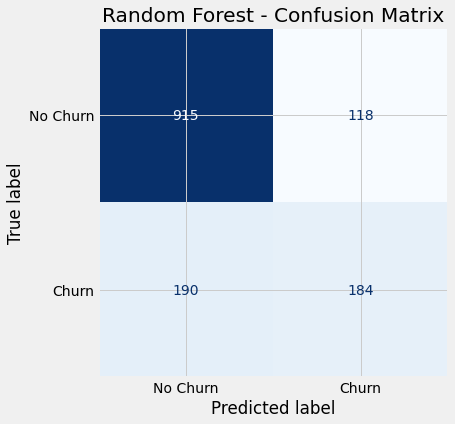

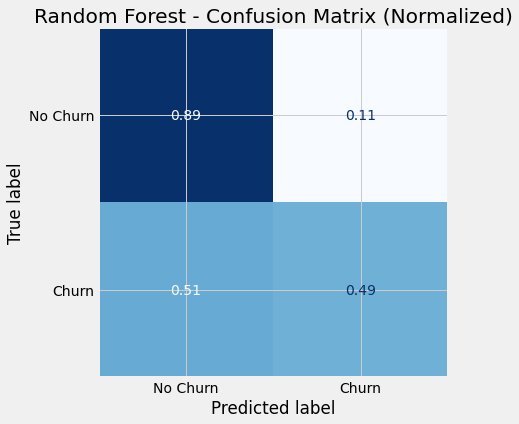

Accuracy Score Test: 0.7811
Accuracy Score Train: 0.9977 (as comparison)



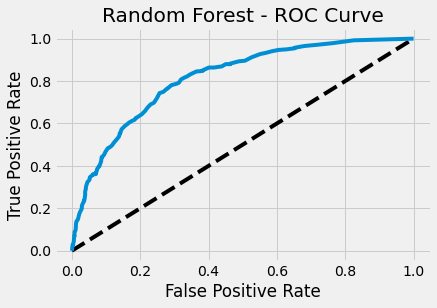

AUC Score (ROC): 0.8125676214338592



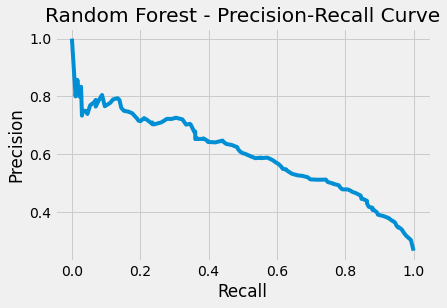

F1 Score: 0.5443786982248521 
AUC Score (PR): 0.6003157140074008



In [49]:
from sklearn.ensemble import RandomForestClassifier

# 훈련 세트를 기반으로 랜덤 포레스트 모델을 생성하고 훈련시킨다.

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_rf = rf.predict(X_test)
y_pred_rf_prob = rf.predict_proba(X_test)

# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, rf, y_pred_rf, 'Random Forest')
roc_curve_auc_score(X_test, y_test, y_pred_rf_prob, 'Random Forest')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf, y_pred_rf_prob, 'Random Forest')

### Support Vector Machine

- 서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다.
- 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

** 결국 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요하다는 뜻이다. **

- 일단 예시를 보자.

- 만약 데이터에 2개 속성(feature)만 있다면 결정 경계는 이렇게 간단한 선 형태가 될 거다.

<!-- <div> -->
<!-- <img src="./pic/svm.png" width="400" height="400" align= center> -->
<!-- </div> -->

- 그러나 속성이 3개로 늘어난다면 이렇게 3차원으로 그려야 한다.

<!-- <div> -->
<!-- <img src="./pic/svm2.png" width="400" height="400" align= center> -->
<!-- </div> -->

- 우리가 이렇게 시각적으로 인지할 수 있는 범위는 딱 3차원까지다.
- 차원, 즉 속성의 개수가 늘어날수록 당연히 복잡해질 거다.
- 결정 경계도 단순한 평면이 아닌 고차원이 될 텐데 이를 “초평면(hyperplane)”이라고 부른다.

** 간단하게 서포트 벡터 머신 (SVM) 이란 **

- SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
- SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
- 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.
- 서포트 벡터와 결정 경계 사이의 거리를 마진(margin)이라고 한다.
- SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.
- 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라 부른다. 반대로 C 값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.

<div>
<img src="./pic/svm3.PNG" width="400" height="400" align= center>
</div>

- SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.
- 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 점을 무한한 차원으로 변환한다.
- RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다.

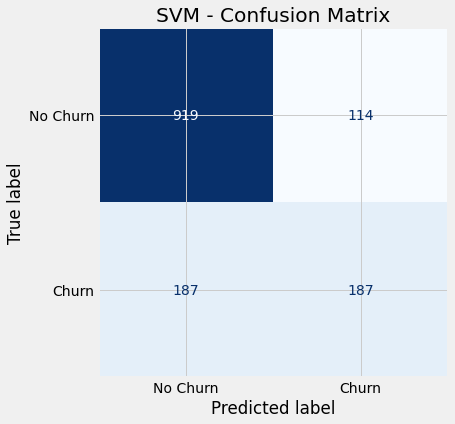

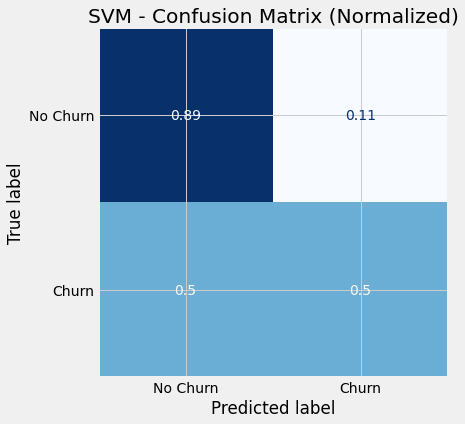

Accuracy Score Test: 0.7861
Accuracy Score Train: 0.8190 (as comparison)



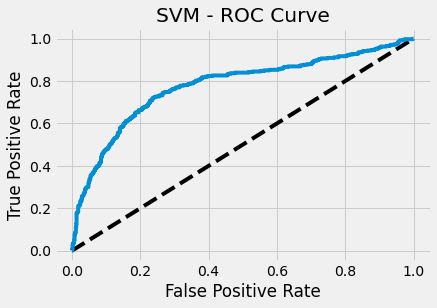

AUC Score (ROC): 0.7763393573569531



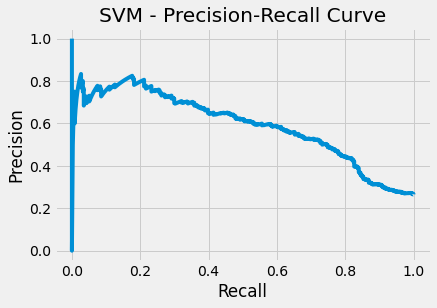

F1 Score: 0.554074074074074 
AUC Score (PR): 0.5889020867127266



In [50]:
from sklearn.svm import SVC

# 훈련 세트에서 SVM 모델을 생성하고 훈련합니다.

support_vector_m = SVC(kernel='rbf', probability=True)
support_vector_m.fit(X_train,y_train)

# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_svm = support_vector_m.predict(X_test)
y_pred_svm_prob = support_vector_m.predict_proba(X_test)

# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m, y_pred_svm, 'SVM')
roc_curve_auc_score(X_test, y_test, y_pred_svm_prob, 'SVM')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm, y_pred_svm_prob, 'SVM')

### 8 단계: 하이퍼 파라미터 튜닝/ 모델 개선 (Hyperparameter Tuning/Model Improvement)

- 훈련-테스트 데이터 세트 분할 부분에서 데이터의 특정 분할로 인한 잠재적 편향을 해결하기 위해 그리드 서치 및 랜덤 서치로 하이퍼 파라미터 튜닝 중에 교차 검증이 사용됩니다.
- 교차 검증은 훈련 데이터를 지정된 폴드 수로 분할합니다.
- 각 반복에 대해 하나의 폴드는 "training-dev"세트로 유지되고 다른 폴드는 트레이닝 세트로 사용됩니다.
- 교차 검증의 결과는 k- 폴드 CV의 모든 메트릭에 대한 k 값입니다.

### K Nearest Neighbors (Optimized)

KNN의 경우 GridSearch CV는 최상의 모델 성능으로 이어지는 최적의 이웃 수 (k)를 결정하는 데 사용됩니다.

In [51]:
from sklearn.model_selection import GridSearchCV

# GridSearch 를 위한 파라미터 및 훈련 모델 정의.

param_grid = {'n_neighbors': np.arange(1, 30)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_knn_tuned = knn_cv.predict(X_test)
y_pred_knn_tuned_prob = knn_cv.predict_proba(X_test)

print('KNN best number of neighbors:', knn_cv.best_params_, '\n')

KNN best number of neighbors: {'n_neighbors': np.int64(22)} 



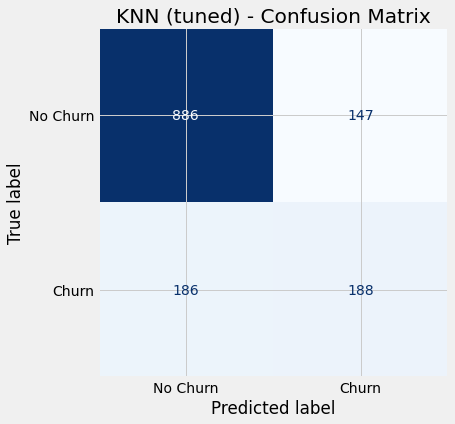

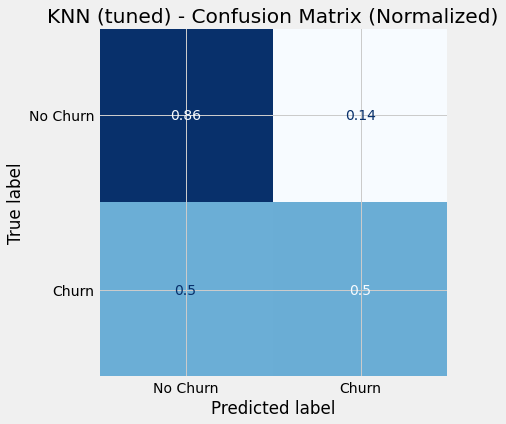

Accuracy Score Test: 0.7633
Accuracy Score Train: 0.8060 (as comparison)



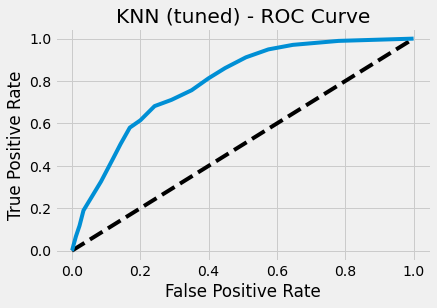

AUC Score (ROC): 0.7907449876016587



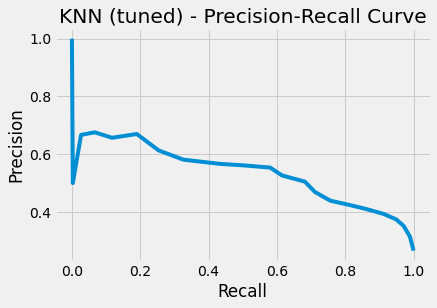

F1 Score: 0.5303244005641748 
AUC Score (PR): 0.5370833744761417



In [52]:
# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, knn_cv, y_pred_knn_tuned, 'KNN (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_knn_tuned_prob, 'KNN (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_knn_tuned, y_pred_knn_tuned_prob, 'KNN (tuned)')

### Logistic Regression (Optimized)

- Logistic Regression의 경우 GridSearchCV는 L1 또는 L2 정규화의 다른 값을 적용하면서 최상의 모델을 결정하는 데 사용되어 의미없는 기능의 영향을 0 (L1)으로 전환하거나 훈련 중에 포착 된 강력한 패턴을 상대화하여 모델을 단순화합니다 (L2).

** 규제 란 ? **

- 과대적합을 해결 하는 대표적인 방법 중 하나인 가중치 규제(regularization) 이다.  
- 가중치 규제란 말 그대로 가중치의 값이 커지지 않도록 제한 하는 기법이다.  
- 가중치를 규제하면 모델의 일반화 성능이 올라간다.

<!-- <div> -->
<!-- <img src="./pic/규제.png" width="400" height="400" align= center> -->
<!-- </div> -->

- 대표적인 규제는 L1 과 L2 규제 이다.

** L1 규제 **
- L1규제는 손실 함수에 가중치의 절대값인 L1 노름(norm)을 추가 한다.

<div>
<img src="./pic/L1.PNG" width="100" height="100" align= center>
</div>

- 즉, L1 규제는 '가중치 절대값을 손실 함수에 더하는 것'이다.
- α는 L1규제의 양을 조절 하는 하이퍼파라메터이다.  
- α값이 크면 전체 손실 함수의 값이 커지지 않도록 w 값의 합이 작어져야 한다. 즉 가중치가 작아진다.
- 회귀모델에 L1 규제를 추가한 것을 라쏘(Lasso)모델이라고 한다.

** L2 규제 **
- L2 규제는 손실 함수에 가중치에 대한 L2 노름(norm)의 제곱을 더한다.

<div>
<img src="./pic/L2.PNG" width="100" height="100" align= center>
</div>

** L1 규제와 L2 규제의 특성 **

- L1규제는 규제가 커질 수록 훈련 세트의 손실과 검증 세트의 손실이 커지고(과소적합화됨)규제가 커질 수록 가중치 값이 "0"에 가까워진다.

- L2 규제는 L1 규제와 비슷한 양상을 보이나,  규제가 강해적조 과소 접합이 심해지지 않는 특성을 가지고 있다. 그래서 L2 규제를 많이 사용한다.

<div>
<img src="./pic/L1특성.PNG" width="500" height="500" align= center>
</div>

<div>
<img src="./pic/L2특성.PNG" width="500" height="500" align= center>
</div>

In [53]:
# GridSearch 를 위한 파라미터 및 훈련 모델 정의.

param_grid_L1 = {'penalty': ['l1', 'l2'], 'C': np.arange(.1, 5, .1)}
logreg_tuned = LogisticRegression(solver='saga', max_iter=30)
logreg_tuned_gs = GridSearchCV(logreg_tuned, param_grid_L1, cv=5)
logreg_tuned_gs.fit(X_train, y_train)

# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_logreg_tuned = logreg_tuned_gs.predict(X_test)
y_pred_logreg_tuned_prob = logreg_tuned_gs.predict_proba(X_test)

print('Logistic Regression - Best Parameters: ', logreg_tuned_gs.best_params_)

Logistic Regression - Best Parameters:  {'C': np.float64(0.9), 'penalty': 'l1'}


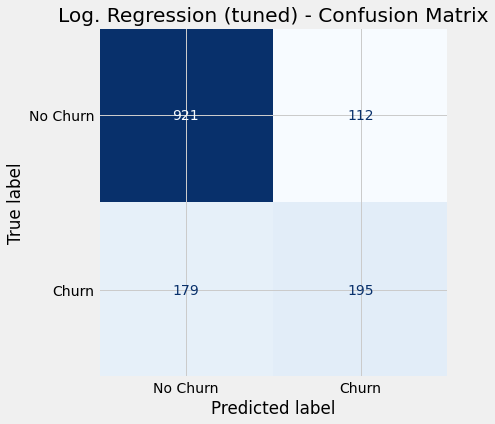

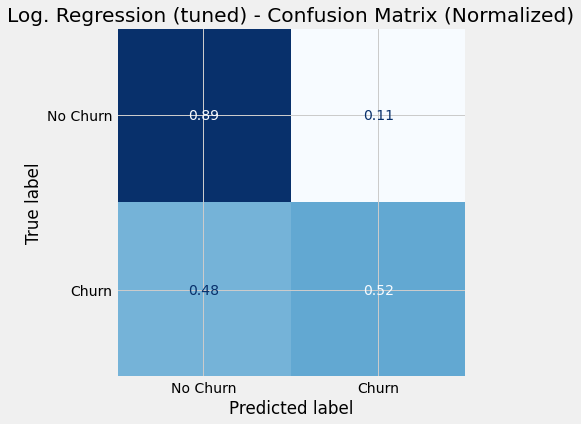

Accuracy Score Test: 0.7932
Accuracy Score Train: 0.8073 (as comparison)



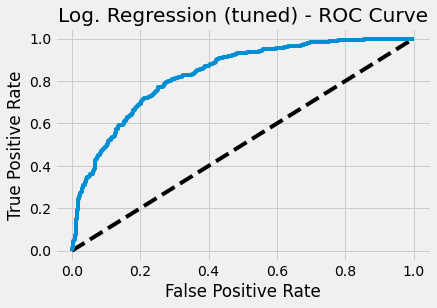

AUC Score (ROC): 0.8323454348737647



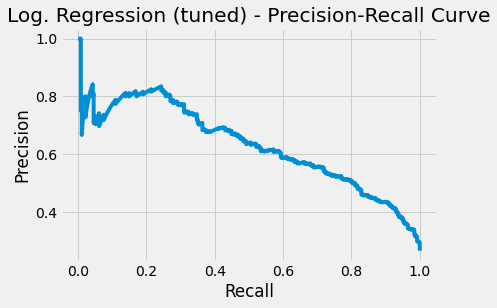

F1 Score: 0.5726872246696035 
AUC Score (PR): 0.6317195306645914



In [54]:
# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, logreg_tuned_gs, y_pred_logreg_tuned, 
                      'Log. Regression (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_logreg_tuned_prob, 'Log. Regression (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_logreg_tuned, y_pred_logreg_tuned_prob, 
                                  'Log. Regression (tuned)')

### Random Forest (Optimized)

- Random Forest 모델의 경우 RandomizedSearchCV는 n_estimators, max_features, max_depth, 기준 및 부트 스트랩을 포함한 여러 하이퍼 파라미터를 최적화하는 데 사용됩니다.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearch 를 위한 파라미터 및 훈련 모델 정의.
param_grid_rf = {'n_estimators': np.arange(10, 100, 10),
                 'max_features': ['auto', 'sqrt'],
                 'max_depth': np.arange(10, 200, 10),
                 'criterion': ['gini', 'entropy'],
                 'bootstrap': [True, False]}

rf = RandomForestClassifier()
rf_random_grid = RandomizedSearchCV(estimator=rf, param_distributions=param_grid_rf, cv=5, verbose=0)
rf_random_grid.fit(X_train, y_train)

# 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_rf_tuned = rf_random_grid.predict(X_test)
y_pred_rf_tuned_prob = rf_random_grid.predict_proba(X_test)

print('Random Forest - Best Parameters: ', rf_random_grid.best_params_)

Random Forest - Best Parameters:  {'n_estimators': np.int64(70), 'max_features': 'sqrt', 'max_depth': np.int64(100), 'criterion': 'gini', 'bootstrap': True}


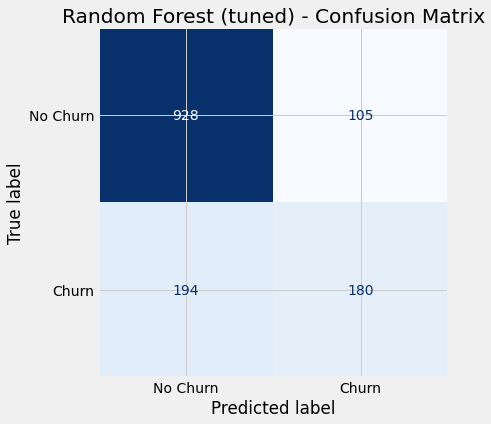

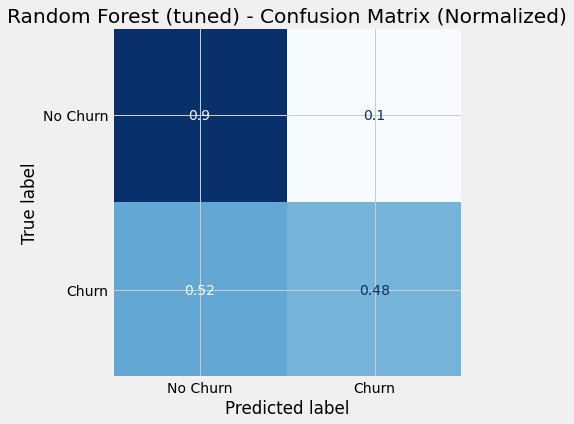

Accuracy Score Test: 0.7875
Accuracy Score Train: 0.9977 (as comparison)



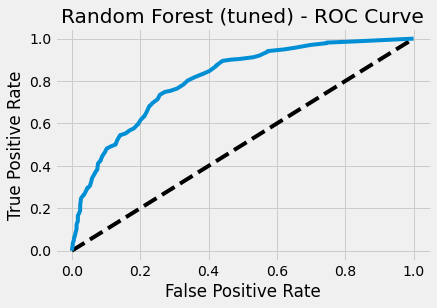

AUC Score (ROC): 0.8080573688597149



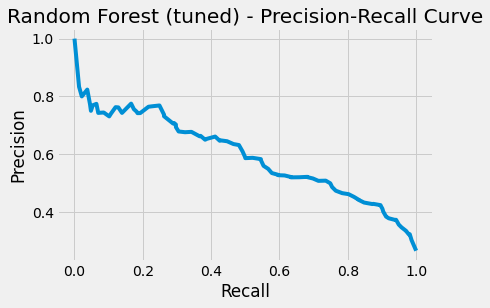

F1 Score: 0.5462822458270106 
AUC Score (PR): 0.5956538386431658



In [56]:
# 모델 평가 시각화

confusion_matrix_plot(X_train, y_train, X_test, y_test, rf_random_grid, y_pred_rf_tuned, 'Random Forest (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_rf_tuned_prob, 'Random Forest (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob, 'Random Forest (tuned)')

### Support Vector Machine (Optimized)

SVM의 경우 GridSearchCV는 서포트 벡터 주변의 최적 마진에 대한 C 값을 결정하는 데 사용됩니다.

In [57]:
#Define parameter grid for GridSearch and instanciate and train model.
param_grid_svm = {'C': np.arange(.1, 3, .1)}
support_vector_m = SVC(kernel='linear', probability=True)
support_vector_m_tuned = GridSearchCV(support_vector_m, param_grid_svm, cv=5)
support_vector_m_tuned.fit(X_train, y_train)

# Make predictions (classes and probabilities) with the trained model on the test set.
y_pred_svm_tuned = support_vector_m_tuned.predict(X_test)
y_pred_svm_tuned_prob = support_vector_m_tuned.predict_proba(X_test)

print('SVM best C value', support_vector_m_tuned.best_params_, '\n')

SVM best C value {'C': np.float64(0.30000000000000004)} 



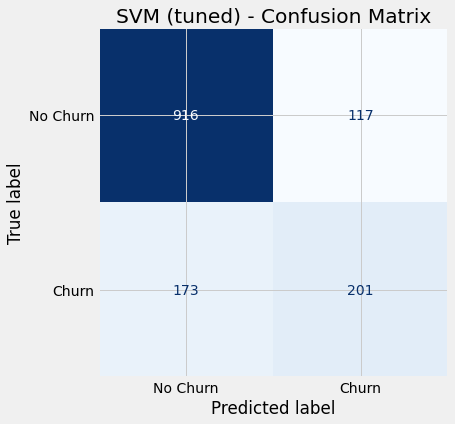

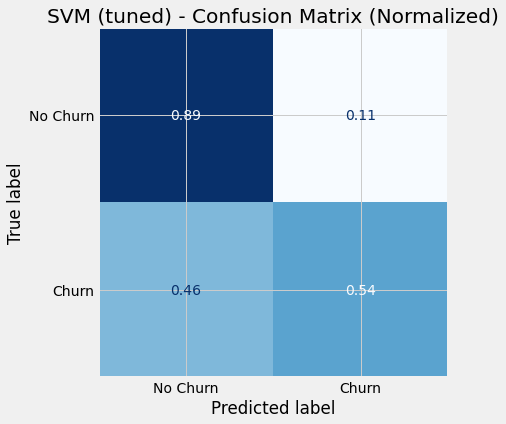

Accuracy Score Test: 0.7939
Accuracy Score Train: 0.8027 (as comparison)



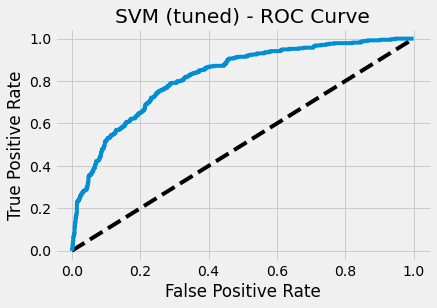

AUC Score (ROC): 0.820042863576831



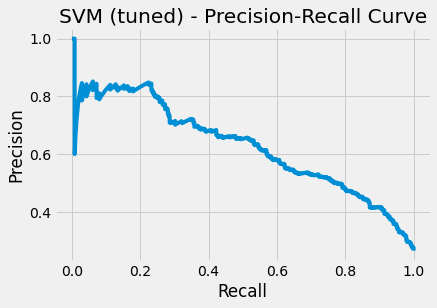

F1 Score: 0.5809248554913294 
AUC Score (PR): 0.6282190631630237



In [58]:
# Plot model evaluations.
confusion_matrix_plot(X_train, y_train, X_test, y_test, support_vector_m_tuned, y_pred_svm_tuned, 'SVM (tuned)')
roc_curve_auc_score(X_test, y_test, y_pred_svm_tuned_prob, 'SVM (tuned)')
precision_recall_curve_and_scores(X_test, y_test, y_pred_svm_tuned, y_pred_svm_tuned_prob, 'SVM (tuned)')

### 추가 기능 : Feed Forward Neural Network

데이터 세트가 비교적 작고 신경망은 일반적으로 의미있는 예측 기능을 개발하기 위해 많은 훈련 데이터를 필요로하지만 다른 접근 방식과의 빠른 비교를 위해 간단한 신경망이 사용됩니다.

In [59]:
# 시간상 생략
# !pip install keras
from keras.models import Sequential, load_model
from keras import layers
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

Defaulting to user installation because normal site-packages is not writeable
    sys-platform (=="darwin") ; extra == 'objc'
                 ~^

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
# print(type(X_train), X_train.dtype)
# print(type(y_train), y_train.dtype)
# X_train[0]

In [60]:
# 데이터 타입 통일 
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')
y_train = np.array(y_train, dtype='float32')
y_test = np.array(y_test, dtype='float32')

In [61]:
# NN, 레이어 구조 및 컴파일 모델 생성
#!pip install tensorflow
from tensorflow.keras.models import Sequential
nn = Sequential()
Input_Shape = X_train.shape[1]

nn.add(layers.Dense(1024, input_shape=(Input_Shape,), activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1024, activation='relu'))
nn.add(Dropout(0.2))
nn.add(layers.Dense(1, activation='sigmoid'))
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn.summary()

# # 교육 중 최상의 검증 정확도로 모델을 저장하도록 콜백을 설정합니다.

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

# # 모델 훈련과 최고 버전 저장

fit_nn = nn.fit(X_train, y_train,
          epochs=100,
          verbose=False,
          validation_data=(X_test, y_test),
          batch_size=30, callbacks=[mc])

best_nn = load_model('best_model.h5')

E0000 00:00:1746550013.333478    9535 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1746550013.336707    9535 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1024)           │        49,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,099,777 (4.20 MB)

 Trainable params: 1,099,777 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# 훈련 완료 후 베스트 모델과 최종모델에 대한 모델평가를 시각화 한다.

accuracy = best_nn.evaluate(X_train, y_train, verbose=False)
print("Best Model Training Score: {:.4f}".format(accuracy[0]))
print("Best Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = best_nn.evaluate(X_test, y_test, verbose=False)
print("Best Model Testing Score: {:.4f}".format(accuracy[0]))
print("Best Model Testing Accuracy: {:.4f}".format(accuracy[1]))
print("-----------------------------------------")

accuracy = nn.evaluate(X_train, y_train, verbose=False)
print("Final Model Training Score: {:.4f}".format(accuracy[0]))
print("Final Model Training Accuracy: {:.4f}".format(accuracy[1]))

accuracy = nn.evaluate(X_test, y_test, verbose=False)
print("Final Model Testing Score: {:.4f}".format(accuracy[0]))
print("Final Model Testing Accuracy: {:.4f}".format(accuracy[1]))

Best Model Training Score: 0.4075
Best Model Training Accuracy: 0.8142
Best Model Testing Score: 0.4411
Best Model Testing Accuracy: 0.7953
-----------------------------------------
Final Model Training Score: 0.0941
Final Model Training Accuracy: 0.9561
Final Model Testing Score: 1.8298
Final Model Testing Accuracy: 0.7541


In [63]:
# 전체 모델 훈련 중 손실 및 정확도의 history를 보여주는 기능을 정의합니다.

def plot_history(fit_keras):
    acc = fit_keras.history['accuracy']
    val_acc = fit_keras.history['val_accuracy']
    loss = fit_keras.history['loss']
    val_loss = fit_keras.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc.')
    plt.plot(x, val_acc, 'r', label='Testing Acc.')
    plt.title('Training & Testing Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Testing Loss')
    plt.title('Training & Testing Accuracy')
    plt.legend()

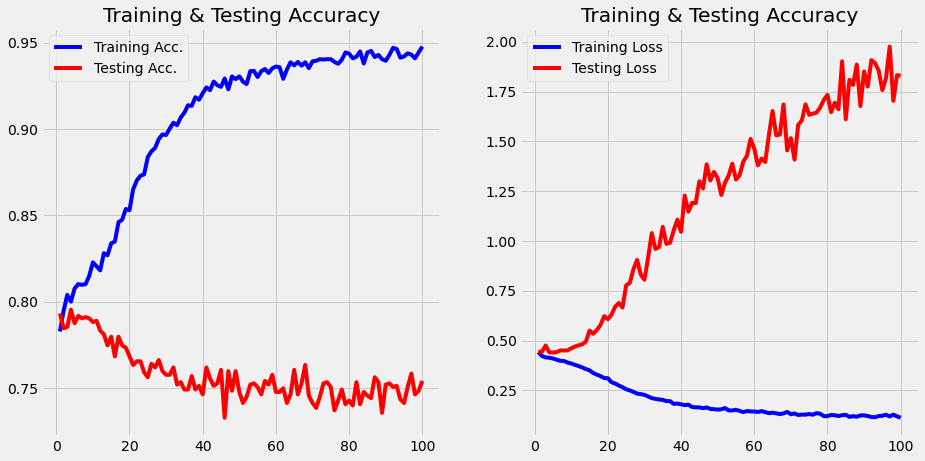

In [64]:
plot_history(fit_nn)

In [65]:
# # 테스트 세트의 훈련된 모델을 사용하여 예측(클래스 및 확률)합니다.

y_pred_nn_prob = best_nn.predict(X_test)
# y_pred_nn_prob = best_nn.predict_proba(X_test)

# y_pred_nn_classes = best_nn.predict_classes(X_test)
y_pred_nn_classes = (y_pred_nn_prob > 0.5).astype(int)


# # 1차원 배열로 줄인다.

# y_pred_nn_prob_1 = y_pred_nn_prob[:,0]
# y_pred_nn_classes_1 = y_pred_nn_classes[:,0]

y_pred_nn_prob_1 = y_pred_nn_prob.flatten()
y_pred_nn_classes_1 = y_pred_nn_classes.flatten()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [66]:
# # NN 평가 지표를 출력.

nn_conf_matrix = confusion_matrix(y_test, y_pred_nn_classes_1)
print(f'Confusion Matrix:\n{nn_conf_matrix}')
print("-----------------------------------------")

nn_accuracy = accuracy_score(y_test, y_pred_nn_classes_1)
print('Accuracy: %f' % nn_accuracy)

nn_auc = roc_auc_score(y_test, y_pred_nn_prob_1)
print('ROC AUC: %f' % nn_auc)
print("-----------------------------------------")

nn_precision = precision_score(y_test, y_pred_nn_classes_1)
print('Precision: %f' % nn_precision)

nn_recall = recall_score(y_test, y_pred_nn_classes_1)
print('Recall: %f' % nn_recall)

nn_f1 = f1_score(y_test, y_pred_nn_classes_1)
print('F1 score: %f' % nn_f1)

Confusion Matrix:
[[924 109]
 [179 195]]
-----------------------------------------
Accuracy: 0.795309
ROC AUC: 0.827922
-----------------------------------------
Precision: 0.641447
Recall: 0.521390
F1 score: 0.575221


### 결론

** 모델 요약 **

- 모델 결과를 살펴보면 테스트 세트에 대한 최상의 정확도는 0,7996의 신경망에 의해 달성됩니다.
- 비 이탈자에 대한 데이터의 높은 불균형을 감안할 때 F1 점수를 비교하여 공동 정밀도 및 재현율에서 가장 좋은 점수를 얻은 모델을 얻는 것이 좋습니다.
- 이것 또한, F1 점수가 0,5948인 신경망이기도합니다.

- 최고 성능 모델의 점수를 감안할 때 F1 점수가 50 %를 훨씬 넘지 않음을 알 수 있습니다.
- 더 높은 점수를 달성하고 더 많은 비즈니스 가치에 대한 예측력을 높이기 위해 추가 최적화 노력을 수행해야합니다.

** 가설 확인 **

- 평가 결과, 특히 로지스틱 회귀의 특성 가중치를 보면 가설을 방향적으로 지원하거나 거부 할 수 있습니다.

- 계약 기간 : 월별 계약 기간이 두 번째로 큰 이탈 요인 → 가설 1 지원됨
- 추가 서비스 수 : 이 기능은 상위 기능에 포함되지 않음 → 가설 2 거부 됨
- 파트너 및 자녀 : 자녀를 갖는 것은 이탈하지 않는 네 번째 기능으로 꼽히지만 강도는 상대적으로 낮음 → 가설 3 부분적으로 지원됨
- 임기 : 높은 임기는 이탈 하지 않는 가장 강력한 요소이자 전체적으로 가장 강력한 기능입니다. 이는 EDA 단계의 박스 플롯에서도 지원됩니다. → 가설 4 지원
- 월별 결제 : 총 결제액은 임기의 곱이고 월별 결제는 이탈의 가장 큰 요인입니다. 간접적으로 높은 월별 지불액은 이탈로 이어집니다. 그러나 임기는 이탈하지 않는 가장 높은 원동력입니다 → 가설 5 거부
- 노인 : 노인은 기능 가중치가 높지 않습니다. 또한 이탈하는 노인 비율이 비 이탈자보다 훨씬 높음 → 가설 6 거부

- 통신사는 일반적으로 CRM 시스템의 확장 고객 및 트랜잭션 데이터와 제공된 네트워크 서비스에 대한 운영 데이터와 같이 분석에 포함될 수있는 훨씬 더 많은 데이터를 사용할 수 있습니다. 또한 일반적으로 ca보다 훨씬 많은 양의 이탈 / 비 이탈 이벤트가 있습니다.
- 이러한 경우, 신경망은 데이터에서 더 복잡한 패턴을 감지하고 더 높은 정확도를 달성하도록 적절하게 훈련 될 수 있습니다.